In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


load_dotenv()
ow_key = os.getenv('ow_key')

In [2]:
df_ip = pd.read_csv('data/inverter_plants.csv')

# Fix NaN plant_address values to 'Gazipur' for consistency
df_ip['plant_address'] = df_ip['plant_address'].fillna('Gazipur')

df = df_ip[['plant_id', 'plant_name', 'plant_address', 'plant_capacity']]

df

,plant_id,plant_name,plant_address,plant_capacity
0,15848107,DGL (GGI),Gazipur,1280.40
1,1535729,SOLshare LM Tower,Dhaka,4.25
2,1535728,BHC,Dhaka,15.66
3,11811249,ACCL (GGI),Gazipur,285.12
4,11605154,NAL (GGI),Gazipur,227.04
5,12018942,ACML (GGI),Gazipur,525.36
6,11701955,CAL (GGI),Gazipur,522.72
7,11838318,HKL (GGI),Gazipur,269.28
8,1535726,Unilever Sales Depot Bogura,Bogura,39.60
9,9977156,KCL (SOLshare),Narayangang,249.20


In [3]:
# Loading 5 minute inverter data
df_5m = pd.read_csv('data/inverter_five_minutes_generation_logs.csv')

# Adding plant name
df_5m = df_5m.merge(df, on='plant_id', how='left')

plant_daylist = df_5m['plant_name'].unique().tolist()
adress_daylist = df_5m['plant_address'].unique().tolist()

In [4]:
print('df_5m'), df_5m.shape, df_5m['generation_date'].min(), df_5m['generation_date'].max(), adress_daylist, df_5m['generation_amount'].mean()

df_5m


(None,
 (849773, 6),
 '2023-01-23 09:00:00 UTC',
 '2025-10-22 15:55:00 UTC',
 ['Gazipur', 'Narayangang', 'Bogura', 'Rajshahi', nan],
 2703.8783414403256)

In [5]:
df_5m = df_5m[df_5m['plant_address'] == 'Gazipur']
df_5m['plant_name'].value_counts()

CAL (GGI)     162175
HKL (GGI)     157090
NAL (GGI)     131320
ACML (GGI)    118685
ACCL (GGI)    101107
DGL (GGI)      17216
Name: plant_name, dtype: int64

In [6]:
df_5m['generation_amount_kwh'] = df_5m['generation_amount'] / 1000

In [7]:
# Remove " , " from the value in generation_amount :
df_5m['generation_amount'] = df_5m['generation_amount'].astype(str).str.replace(',', '')

# Transform "generation_amount" value to float
df_5m['generation_amount'] = df_5m['generation_amount'].astype(float)

df_5m['generation_date'] = pd.to_datetime(df_5m['generation_date'])
df_5m['date'] = df_5m['generation_date'].dt.date

In [8]:
biggest = df_5m['generation_amount'].max()
smaller_val = df_5m['generation_amount'].min()
df_temp = df_5m[df_5m['generation_amount'] != 0]
biggest_non_zero = df_temp['generation_amount'].min()
print(f' biggest = {biggest} - {biggest_non_zero}\n smaller_val = {smaller_val}')

 biggest = 684212.2056 - 0.0027489
 smaller_val = 0.0


In [9]:
for i in plant_daylist:
    df_temp = df_5m[df_5m['plant_name'] == i]

    start = df_temp['date'].min()
    end = df_temp['date'].max()

    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    days = (end_dt - start_dt).days
    data_point = len(df_temp)

    print(i)
    print(f'days = {days}')
    print(f'hour = {days * 288}')
    print(f'data_point = {data_point}')
    print(start)
    print(end)
    print('\n')


ACCL (GGI)
days = 689
hour = 198432
data_point = 101107
2023-12-03
2025-10-22


ACML (GGI)
days = 617
hour = 177696
data_point = 118685
2024-02-13
2025-10-22


CAL (GGI)
days = 691
hour = 199008
data_point = 162175
2023-12-01
2025-10-22


HKL (GGI)
days = 675
hour = 194400
data_point = 157090
2023-12-17
2025-10-22


NAL (GGI)
days = 690
hour = 198720
data_point = 131320
2023-12-02
2025-10-22


KCL (SOLshare)
days = nan
hour = nan
data_point = 0
nan
nan


Unilever Sales Depot Bogura
days = nan
hour = nan
data_point = 0
nan
nan


Faruk Auto Garage Rajshahi
days = nan
hour = nan
data_point = 0
nan
nan


nan
days = nan
hour = nan
data_point = 0
nan
nan


DGL (GGI)
days = 114
hour = 32832
data_point = 17216
2025-06-30
2025-10-22




In [10]:
df_5m

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,generation_amount_kwh,date
0,11811249,2025-02-05 18:05:00+00:00,0.0,ACCL (GGI),Gazipur,285.12,0.0,2025-02-05
1,11811249,2025-02-05 18:10:00+00:00,0.0,ACCL (GGI),Gazipur,285.12,0.0,2025-02-05
2,11811249,2025-02-05 18:15:00+00:00,0.0,ACCL (GGI),Gazipur,285.12,0.0,2025-02-05
3,11811249,2025-02-05 18:20:00+00:00,0.0,ACCL (GGI),Gazipur,285.12,0.0,2025-02-05
4,11811249,2025-02-05 18:25:00+00:00,0.0,ACCL (GGI),Gazipur,285.12,0.0,2025-02-05
...,...,...,...,...,...,...,...,...
849768,12018942,2024-07-28 19:00:00+00:00,0.0,ACML (GGI),Gazipur,525.36,0.0,2024-07-28
849769,12018942,2024-07-28 21:30:00+00:00,0.0,ACML (GGI),Gazipur,525.36,0.0,2024-07-28
849770,12018942,2024-07-28 22:55:00+00:00,0.0,ACML (GGI),Gazipur,525.36,0.0,2024-07-28
849771,12018942,2024-08-03 14:40:00+00:00,0.0,ACML (GGI),Gazipur,525.36,0.0,2024-08-03


ACCL (GGI)
plant_capacity 285.12
max generation 220 - 77 %
2023-12-03 > 2025-10-22 - 689 days
expected data point vs available data point: 198432 - 101107 = 97325 (missing data)
data availability 51.0%
non_zero_generation_amount 61504 31.0%


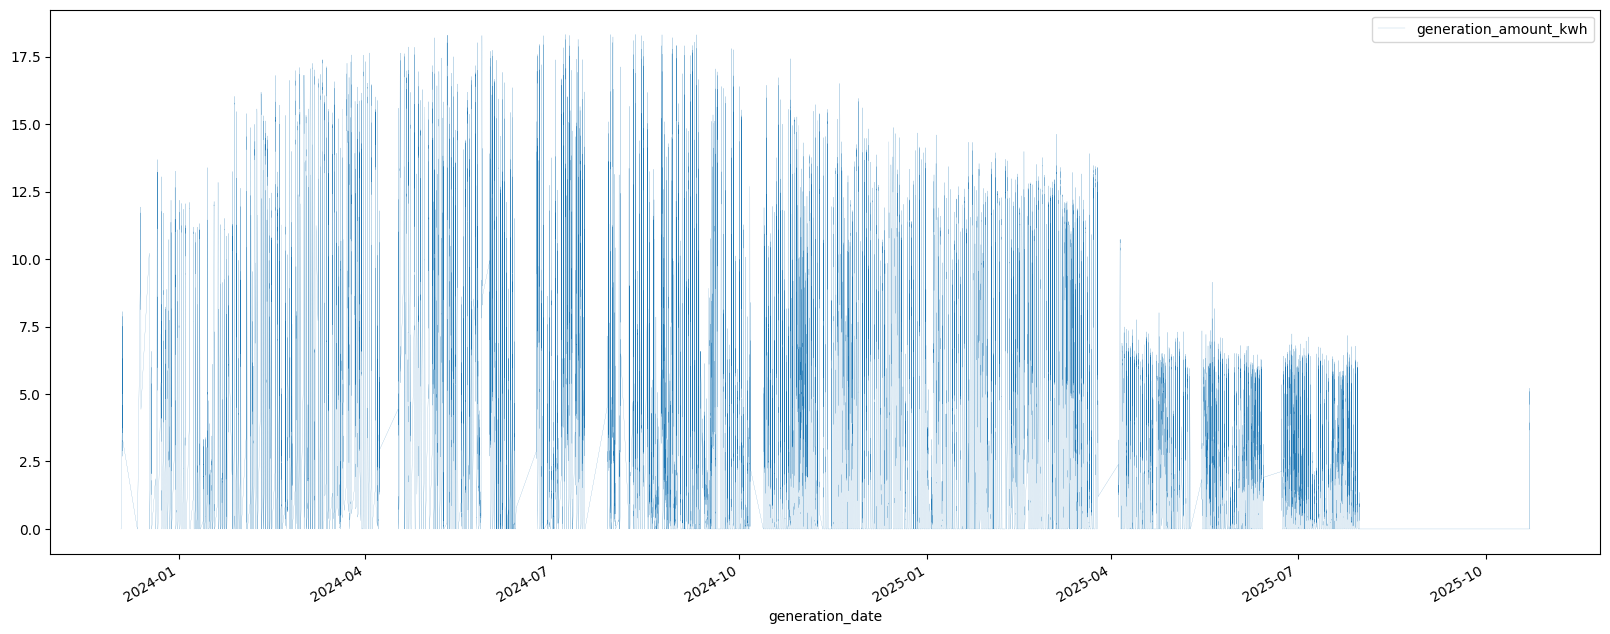

ACML (GGI)
plant_capacity 525.36
max generation 350 - 67 %
2024-02-13 > 2025-10-22 - 617 days
expected data point vs available data point: 177696 - 118685 = 59011 (missing data)
data availability 66.8%
non_zero_generation_amount 67908 38.2%


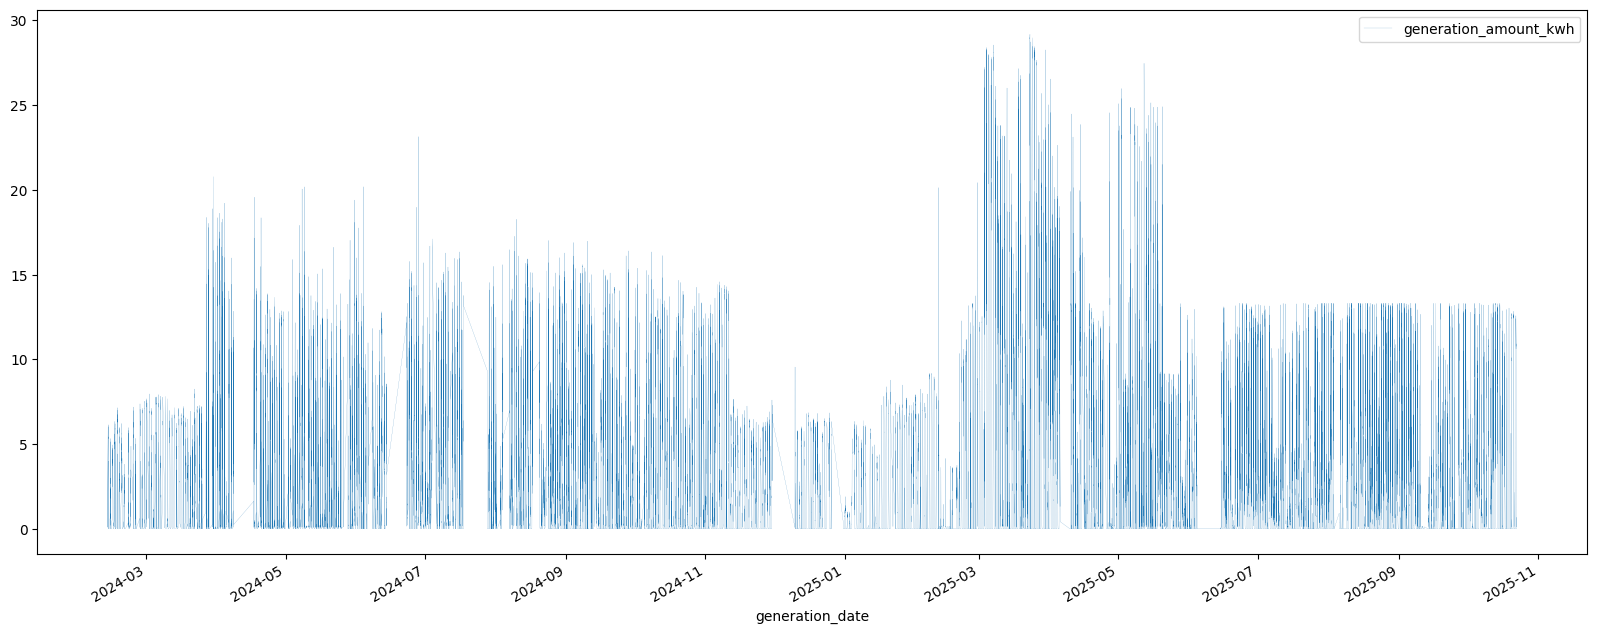

CAL (GGI)
plant_capacity 522.72
max generation 376 - 72 %
2023-12-01 > 2025-10-22 - 691 days
expected data point vs available data point: 199008 - 162175 = 36833 (missing data)
data availability 81.5%
non_zero_generation_amount 78382 39.4%


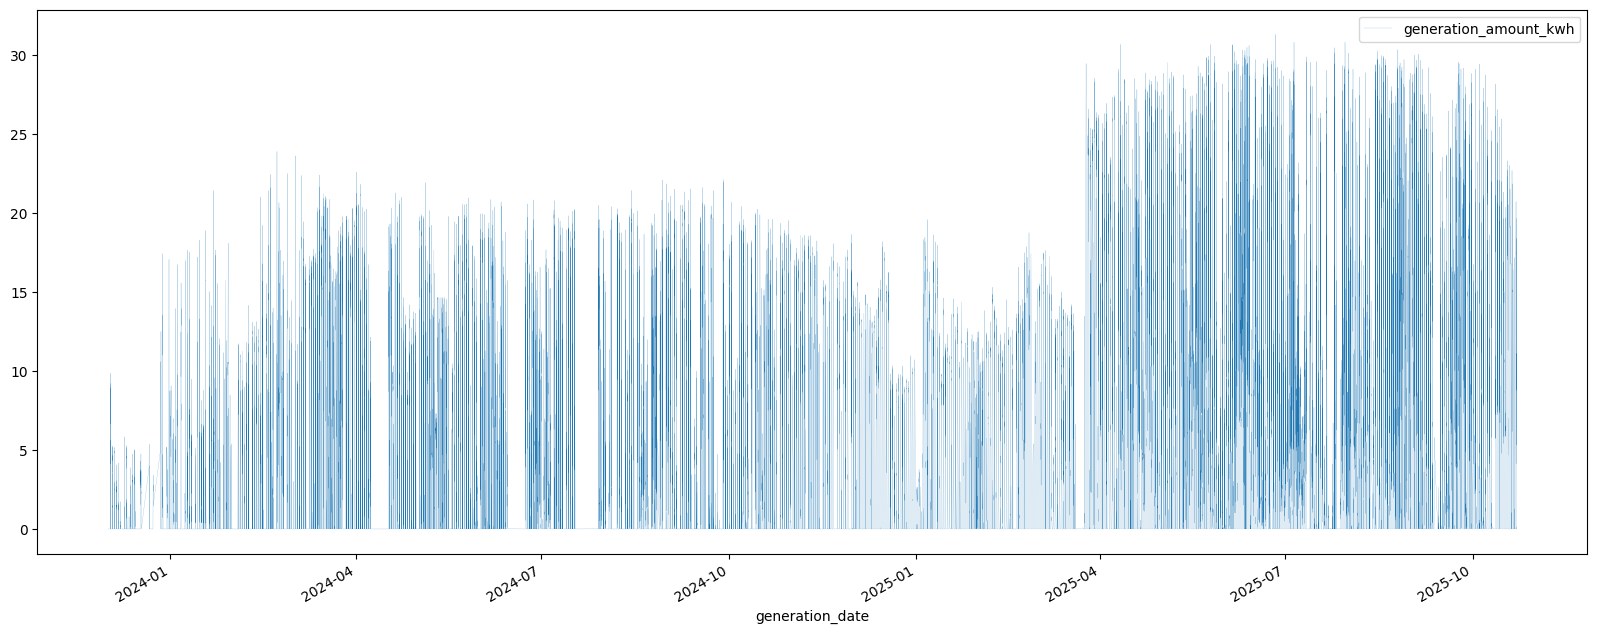

HKL (GGI)
plant_capacity 269.28
max generation 220 - 82 %
2023-12-17 > 2025-10-22 - 675 days
expected data point vs available data point: 194400 - 157090 = 37310 (missing data)
data availability 80.8%
non_zero_generation_amount 85614 44.0%


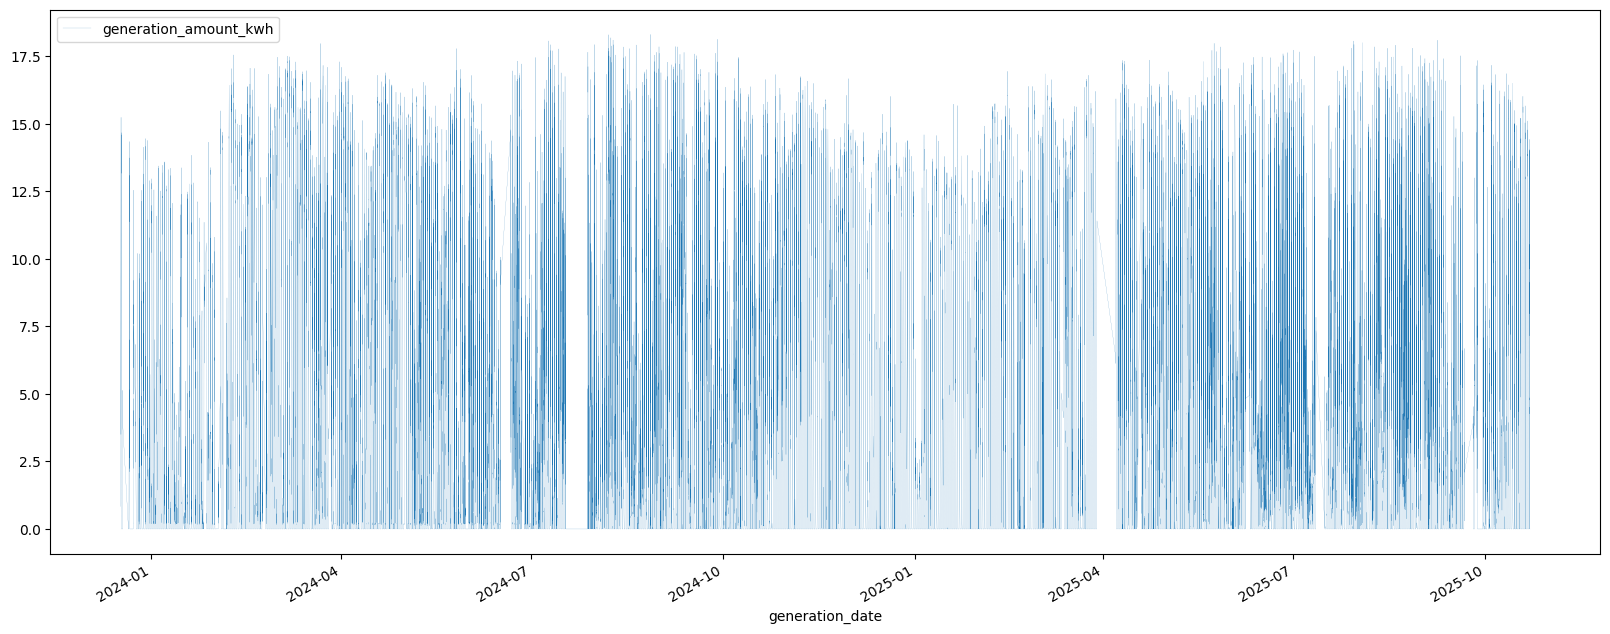

NAL (GGI)
plant_capacity 227.04
max generation 8211 - 3617 %
2023-12-02 > 2025-10-22 - 690 days
expected data point vs available data point: 198720 - 131320 = 67400 (missing data)
data availability 66.1%
non_zero_generation_amount 85244 42.9%


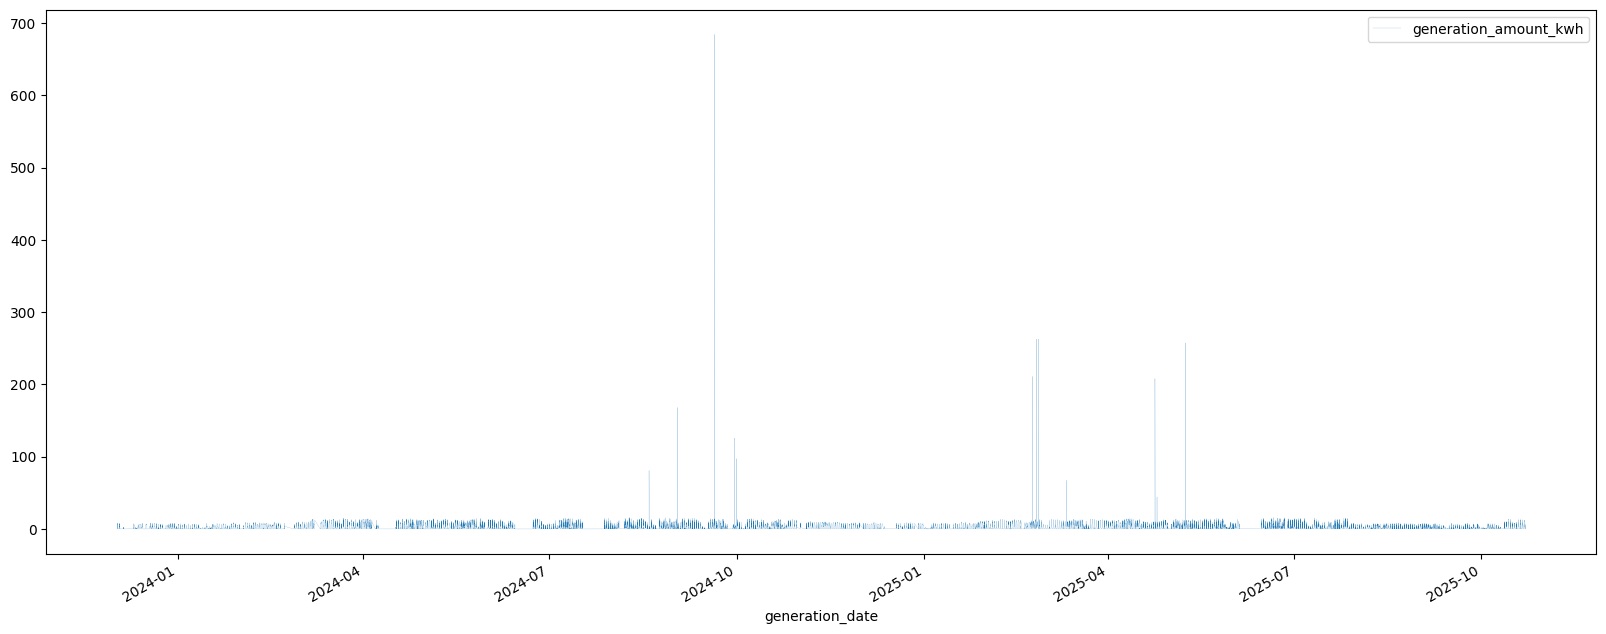

DGL (GGI)
plant_capacity 1280.4
max generation 920 - 72 %
2025-06-30 > 2025-10-22 - 114 days
expected data point vs available data point: 32832 - 17216 = 15616 (missing data)
data availability 52.4%
non_zero_generation_amount 10495 32.0%


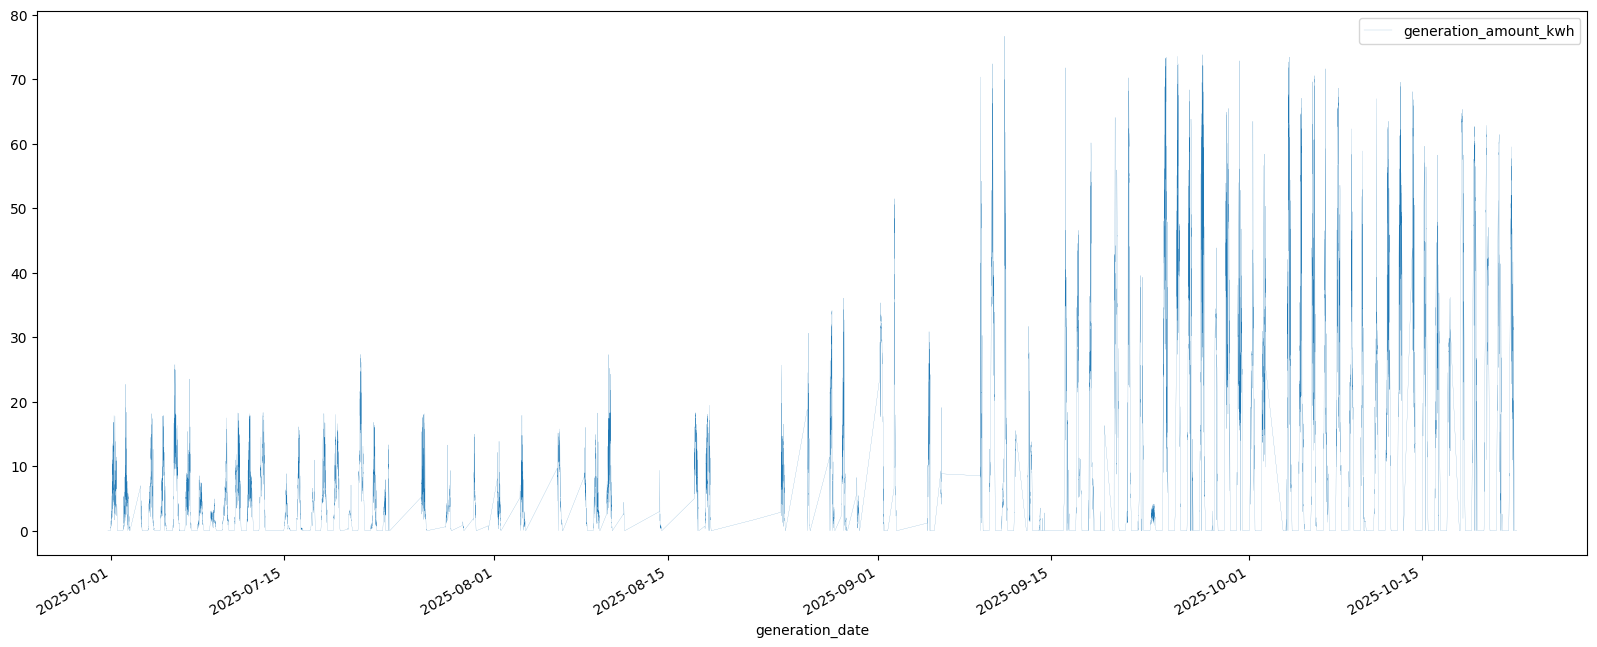

In [11]:
df_5m
plant_list = df_5m['plant_name'].unique()

for i in plant_list:
    figsize = (20, 8)

    df_temp = df_5m[df_5m['plant_name'] == i]

    start = df_temp['date'].min()
    end = df_temp['date'].max()
    days = (end - start).days
    plant_capacity = df_temp['plant_capacity'].min()
    max_generation = round((df_temp['generation_amount'].max() * 12) / 1000)
    print(i)
    print('plant_capacity', plant_capacity)
    print('max generation', max_generation, '-', round(max_generation / plant_capacity * 100),'%')

    print(start, '>', end, '-', days, 'days')
    exp_data =  days * 24 * 12
    avail_data = len(df_temp['generation_amount_kwh'])
    print('expected data point vs available data point:', exp_data, '-', avail_data, '=', exp_data - avail_data, '(missing data)')
    print('data availability', f"{avail_data / exp_data:.1%}" if exp_data else "N/A")

    df_non_zero = df_temp[df_temp['generation_amount_kwh'] != 0]
    print('non_zero_generation_amount', len(df_non_zero), f"{len(df_non_zero) / exp_data :.1%}" if exp_data else "N/A")
    df_temp.plot(x='generation_date', y='generation_amount_kwh', figsize=figsize, linewidth=0.1)
    plt.show()

In [12]:
# Resample generation data from 5-minute to hourly sum, per plant (don't sum different plants together)
# Keep 'plant_capacity' in the resulting dataframe

df_5m_hourly = (
    df_5m.set_index('generation_date')
         .groupby(['plant_name', 'plant_capacity', 'date'])
         .resample('H')['generation_amount']
         .sum()
         .reset_index()
)

df_5m_hourly['generation_amount_kwh'] = df_5m_hourly['generation_amount'] / 1000

ACCL (GGI)
plant_capacity 285.12
max generation 480 - 168 %
2023-12-03 > 2025-10-22 - 689 days
expected data point vs available data point: 16536 - 9465 = 7071 (missing data)
data availability 57.2%
non_zero_generation_amount 5731 34.7%


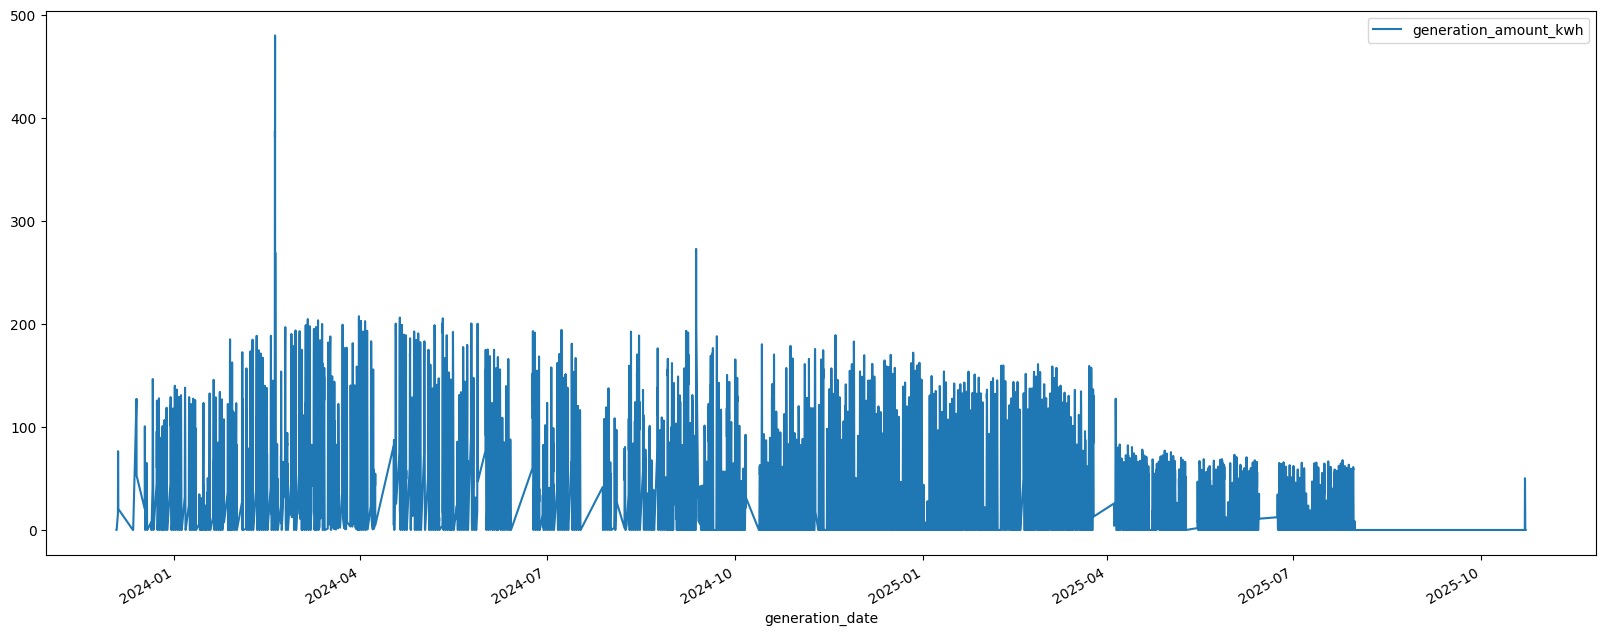

ACML (GGI)
plant_capacity 525.36
max generation 470 - 89 %
2024-02-13 > 2025-10-22 - 617 days
expected data point vs available data point: 14808 - 11301 = 3507 (missing data)
data availability 76.3%
non_zero_generation_amount 6510 44.0%


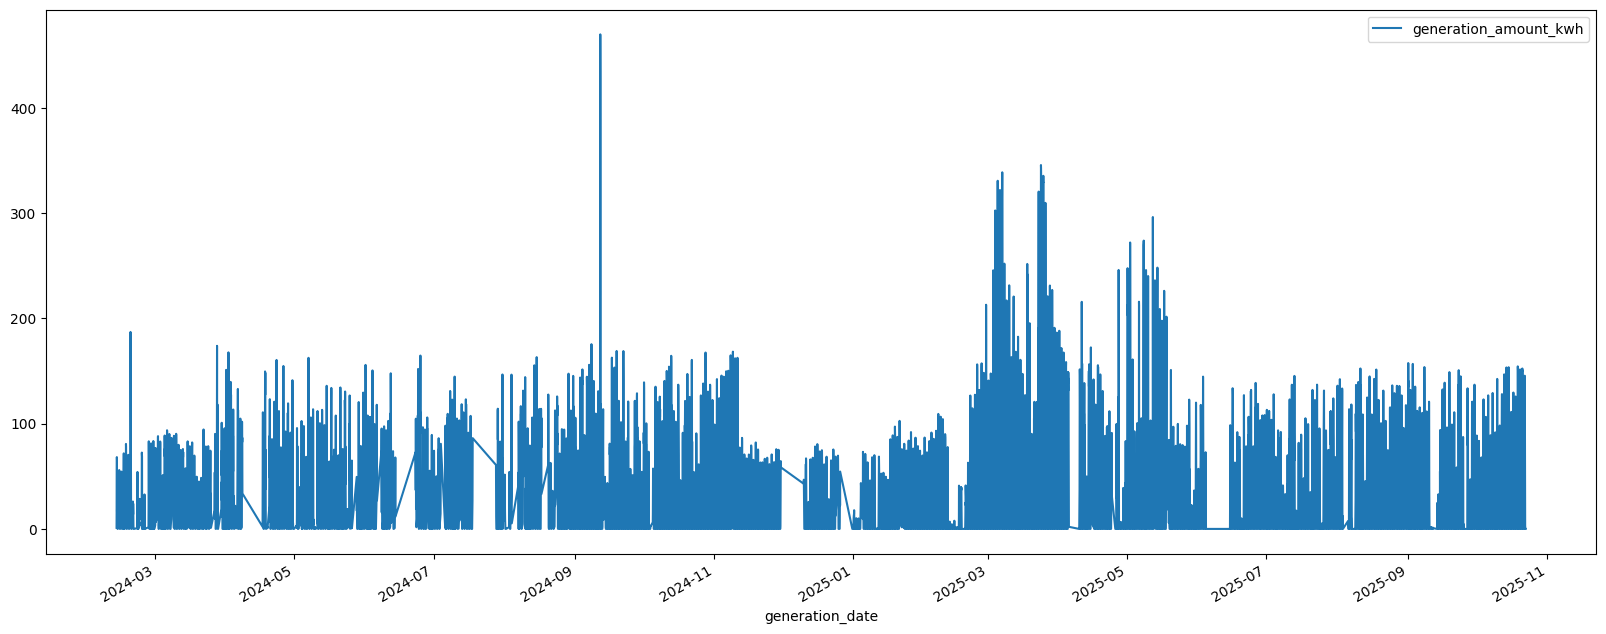

CAL (GGI)
plant_capacity 522.72
max generation 579 - 111 %
2023-12-01 > 2025-10-22 - 691 days
expected data point vs available data point: 16584 - 15008 = 1576 (missing data)
data availability 90.5%
non_zero_generation_amount 7212 43.5%


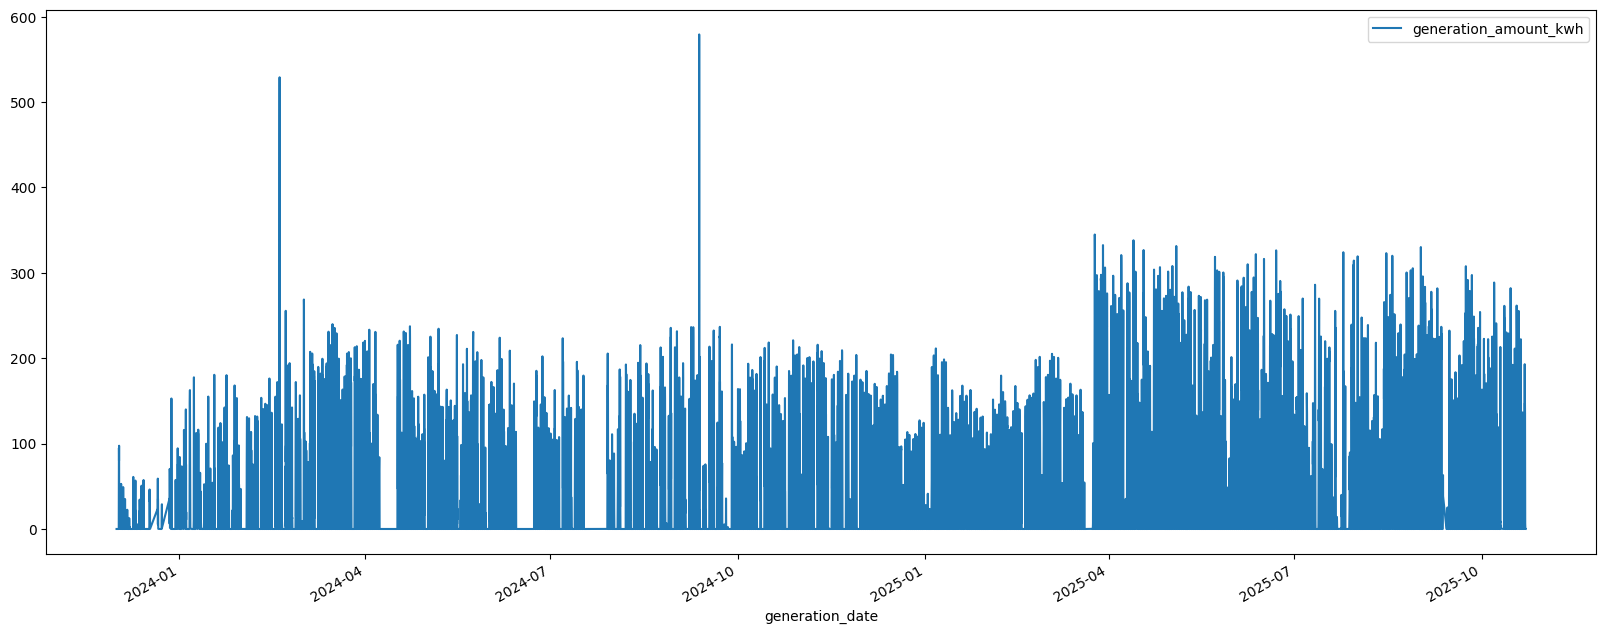

DGL (GGI)
plant_capacity 1280.4
max generation 757 - 59 %
2025-06-30 > 2025-10-22 - 114 days
expected data point vs available data point: 2736 - 1661 = 1075 (missing data)
data availability 60.7%
non_zero_generation_amount 990 36.2%


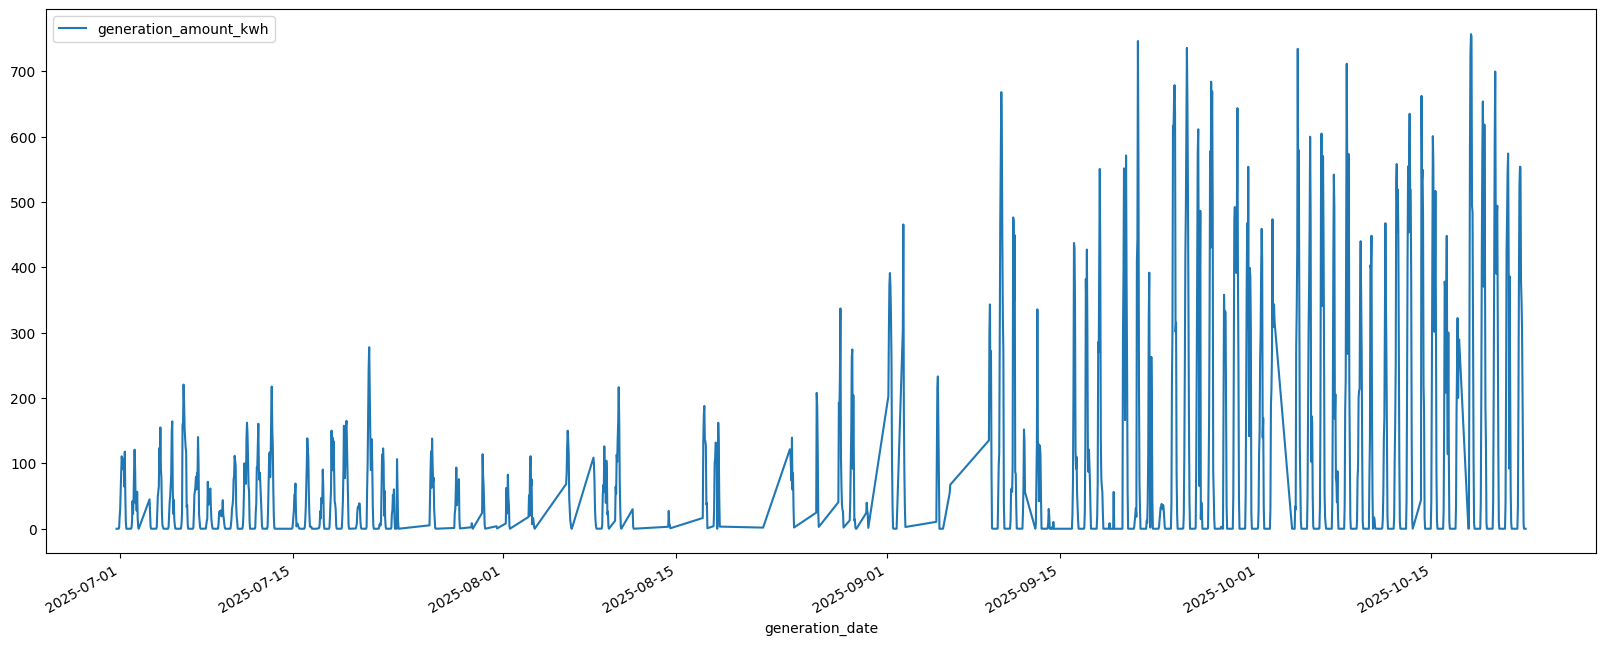

HKL (GGI)
plant_capacity 269.28
max generation 548 - 204 %
2023-12-17 > 2025-10-22 - 675 days
expected data point vs available data point: 16200 - 14863 = 1337 (missing data)
data availability 91.7%
non_zero_generation_amount 8049 49.7%


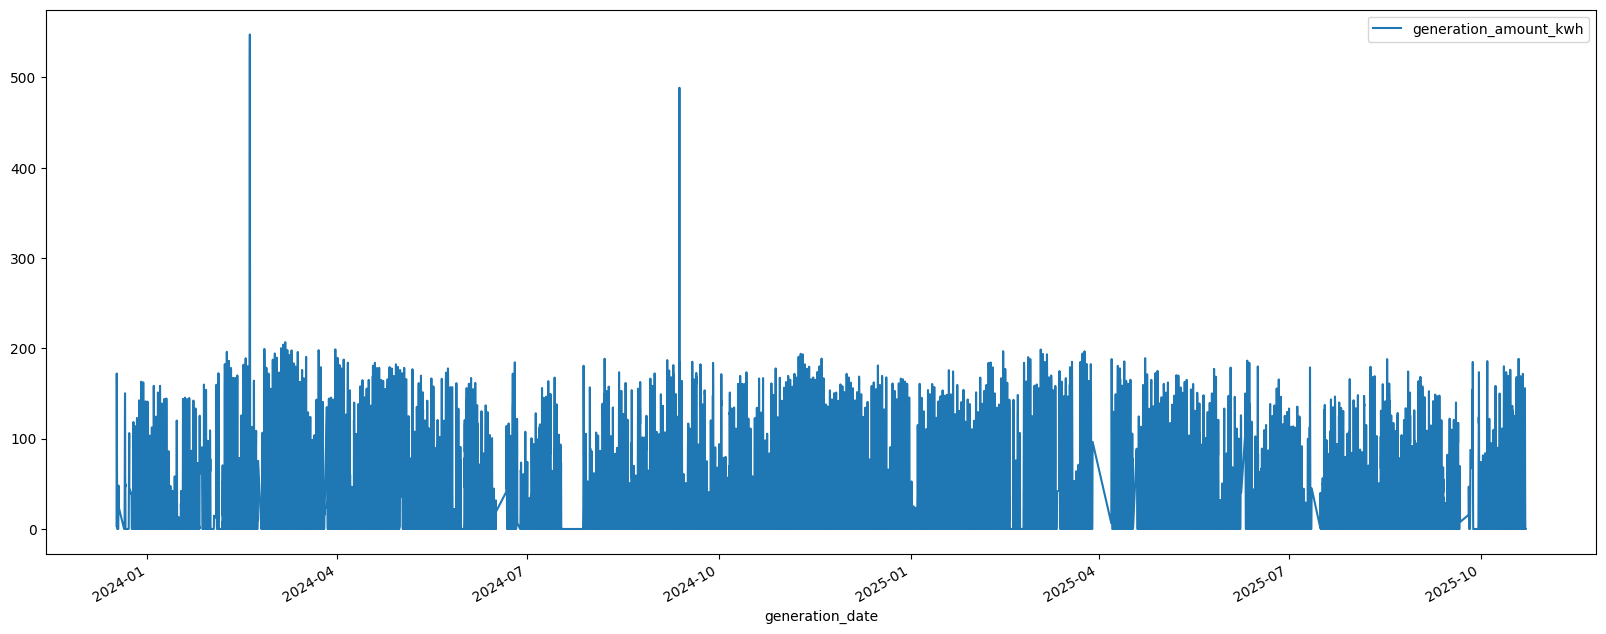

NAL (GGI)
plant_capacity 227.04
max generation 684 - 301 %
2023-12-02 > 2025-10-22 - 690 days
expected data point vs available data point: 16560 - 13320 = 3240 (missing data)
data availability 80.4%
non_zero_generation_amount 7875 47.6%


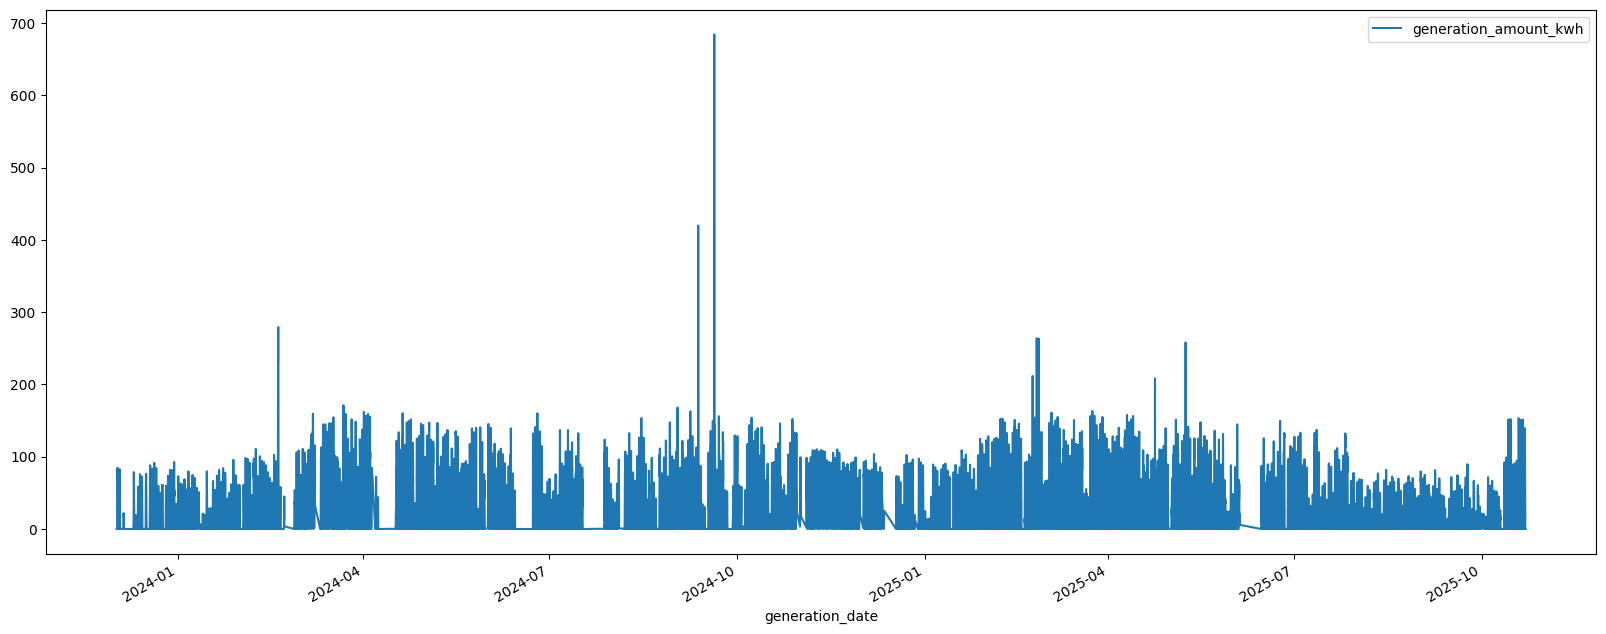

In [13]:
df_5m_hourly
plant_list = df_5m_hourly['plant_name'].unique()

for i in plant_list:
    figsize = (20, 8)

    df_temp = df_5m_hourly[df_5m_hourly['plant_name'] == i]

    start = df_temp['date'].min()
    end = df_temp['date'].max()
    days = (end - start).days
    plant_capacity = df_temp['plant_capacity'].min()
    max_generation = round((df_temp['generation_amount_kwh'].max()))
    print(i)
    print('plant_capacity', plant_capacity)
    print('max generation', max_generation, '-', round(max_generation / plant_capacity * 100),'%')

    print(start, '>', end, '-', days, 'days')
    exp_data =  days * 24
    avail_data = len(df_temp['generation_amount_kwh'])
    print('expected data point vs available data point:', exp_data, '-', avail_data, '=', exp_data - avail_data, '(missing data)')
    print('data availability', f"{avail_data / exp_data:.1%}" if exp_data else "N/A")

    df_non_zero = df_temp[df_temp['generation_amount_kwh'] != 0]
    print('non_zero_generation_amount', len(df_non_zero), f"{len(df_non_zero) / exp_data :.1%}" if exp_data else "N/A")
    df_temp.plot(x='generation_date', y='generation_amount_kwh', figsize=figsize)
    plt.show()

ACCL (GGI)
2023-12-03 > 2025-10-22 - 689 days
expected data point : 16536
available data point : 9465
non_zero_data 5731


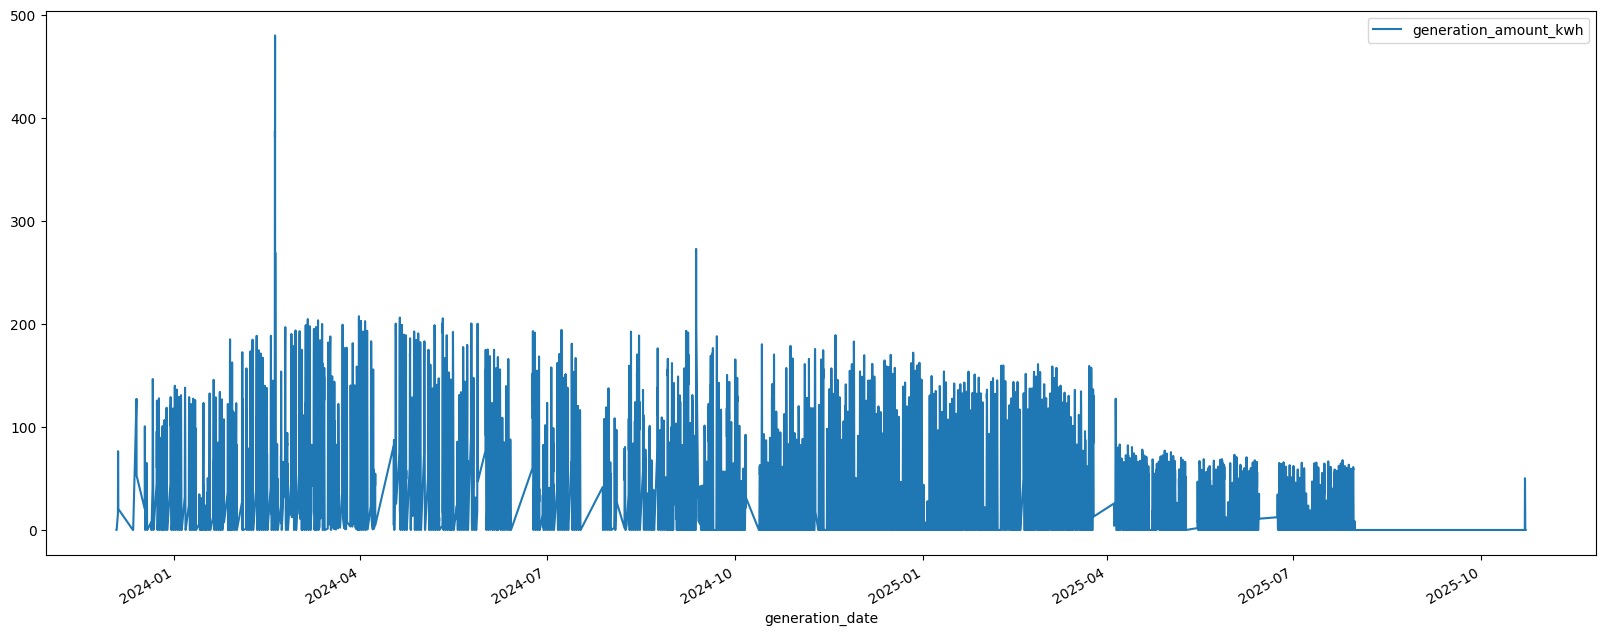

ACML (GGI)
2024-02-13 > 2025-10-22 - 617 days
expected data point : 14808
available data point : 11301
non_zero_data 6510


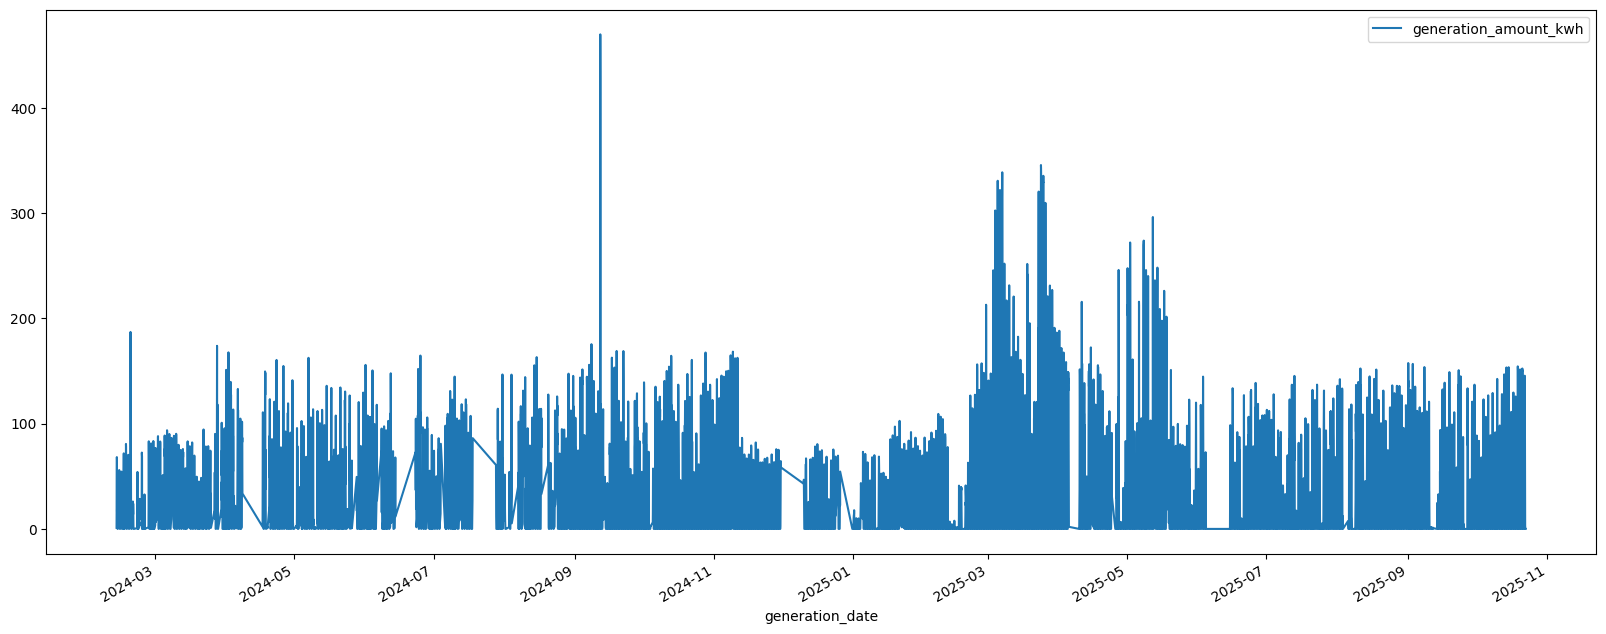

CAL (GGI)
2023-12-01 > 2025-10-22 - 691 days
expected data point : 16584
available data point : 15008
non_zero_data 7212


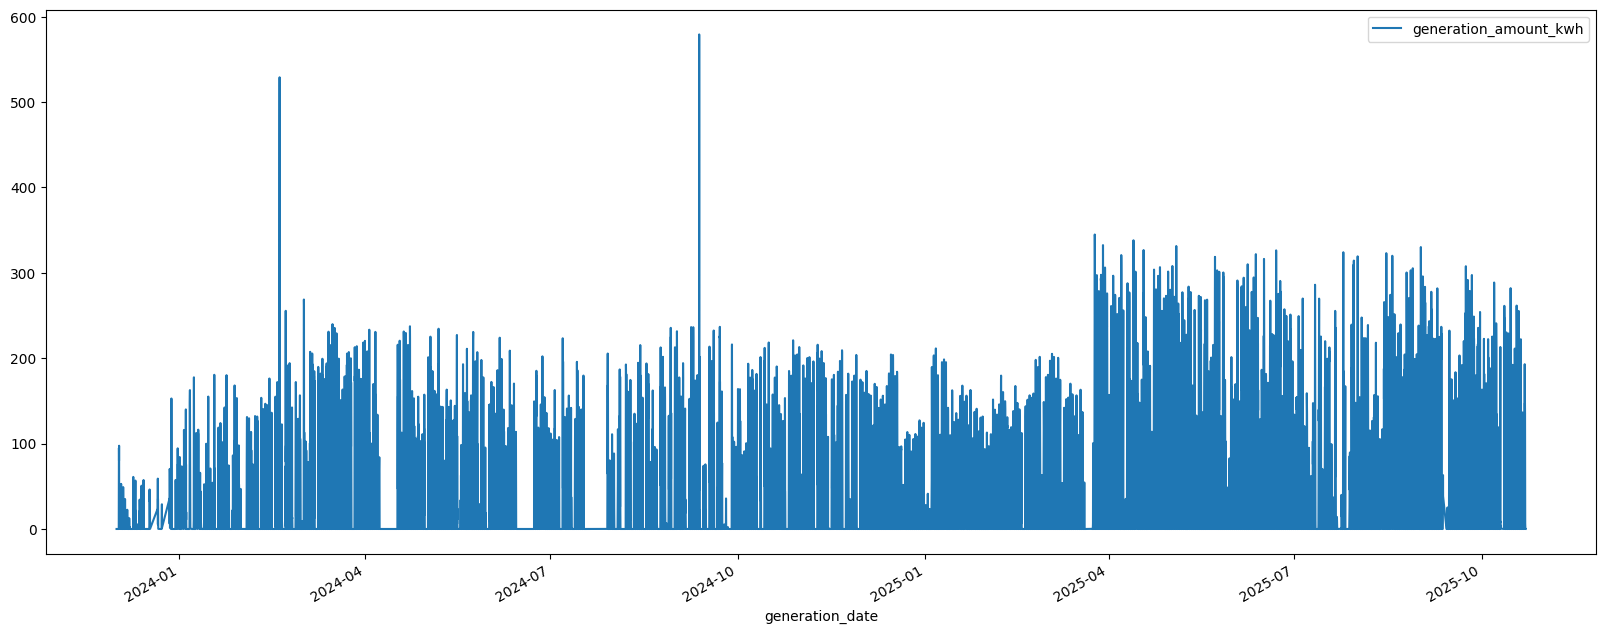

DGL (GGI)
2025-06-30 > 2025-10-22 - 114 days
expected data point : 2736
available data point : 1661
non_zero_data 990


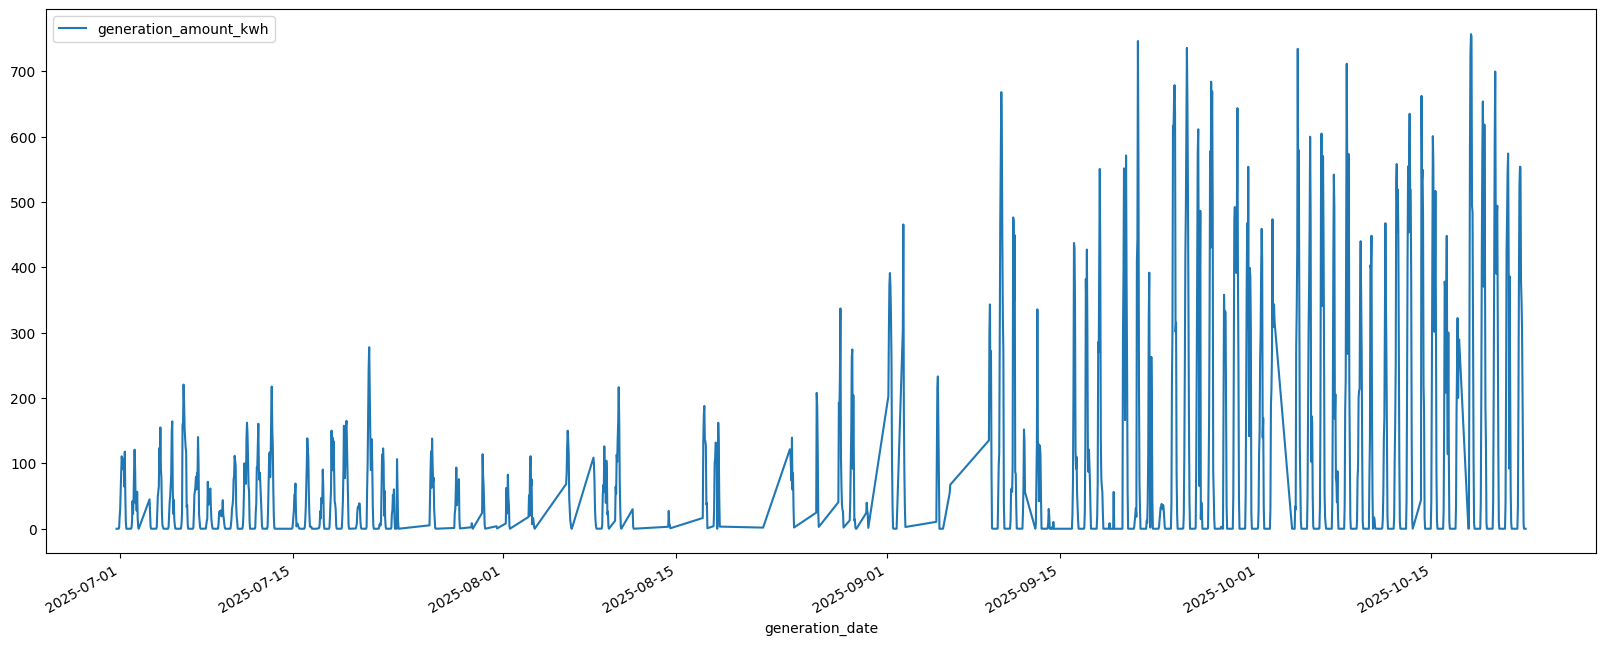

HKL (GGI)
2023-12-17 > 2025-10-22 - 675 days
expected data point : 16200
available data point : 14863
non_zero_data 8049


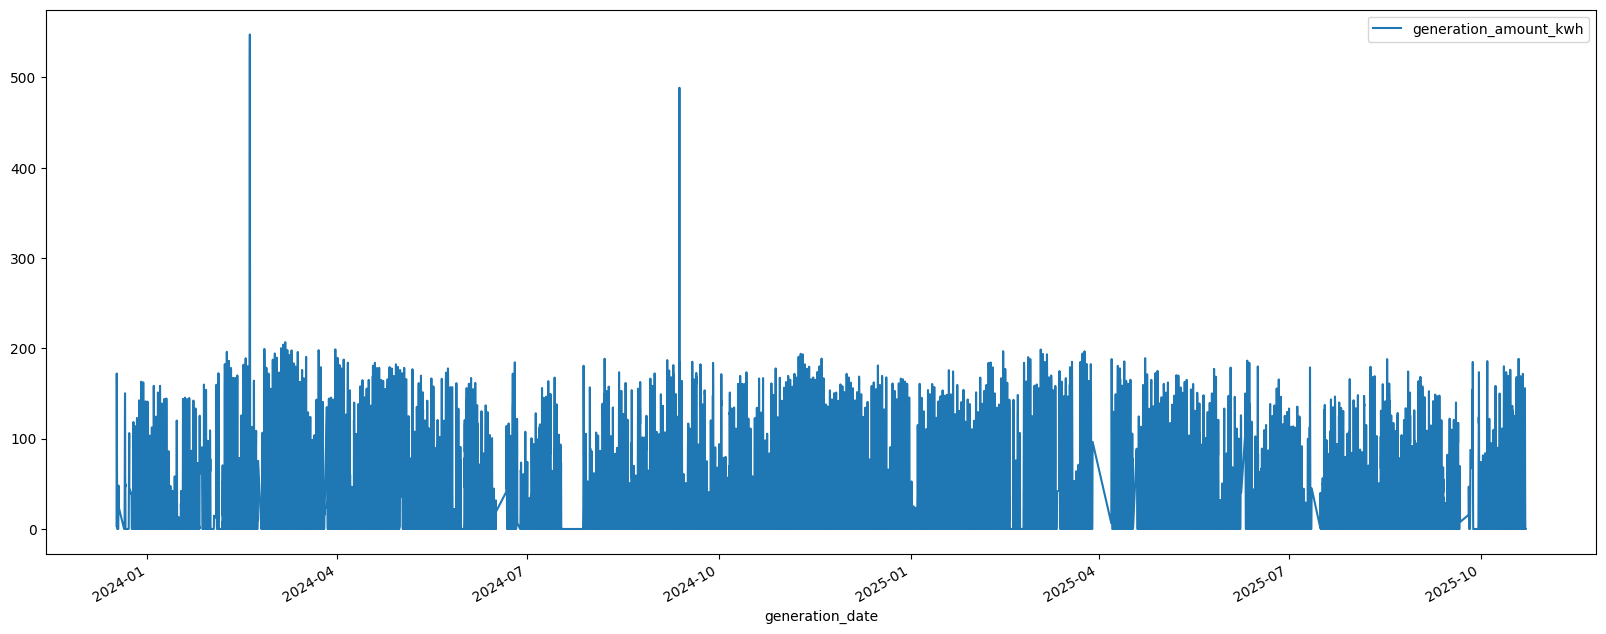

NAL (GGI)
2023-12-02 > 2025-10-22 - 690 days
expected data point : 16560
available data point : 13320
non_zero_data 7875


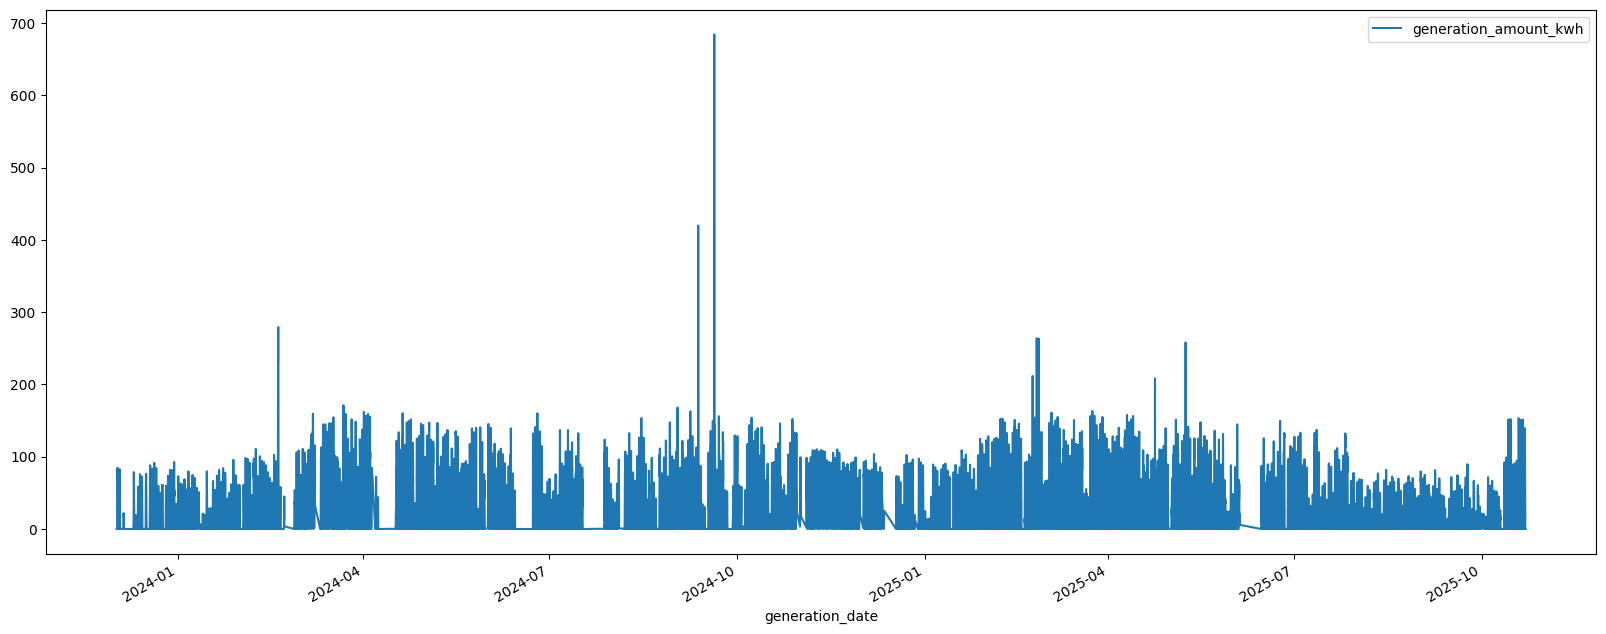

In [14]:
df_5m_hourly
plant_list = df_5m_hourly['plant_name'].unique()

for i in plant_list:
    figsize = (20, 8)
    df_temp = df_5m_hourly[df_5m_hourly['plant_name'] == i]
    start = df_temp['date'].min()
    end = df_temp['date'].max()
    days = (end - start).days
    print(i)
    print(start, '>', end, '-', days, 'days')
    print('expected data point :', days * 24)
    print('available data point :', len(df_temp['generation_amount_kwh']))
    df_non_zero = df_temp[df_temp['generation_amount_kwh'] != 0]
    print('non_zero_data', len(df_non_zero))
    df_temp.plot(x='generation_date', y='generation_amount_kwh', figsize=figsize)
    plt.show()

In [15]:
df_5m_hourly.tail(50)
df_HKL = df_5m_hourly[df_5m_hourly['plant_name'] == 'HKL (GGI)']
df_HKL

,plant_name,plant_capacity,date,generation_date,generation_amount,generation_amount_kwh
37435,HKL (GGI),269.28,2023-12-17,2023-12-17 10:00:00+00:00,3214.144411,3.214144
37436,HKL (GGI),269.28,2023-12-17,2023-12-17 11:00:00+00:00,143194.428392,143.194428
37437,HKL (GGI),269.28,2023-12-17,2023-12-17 12:00:00+00:00,172095.884100,172.095884
37438,HKL (GGI),269.28,2023-12-17,2023-12-17 13:00:00+00:00,158937.316383,158.937316
37439,HKL (GGI),269.28,2023-12-17,2023-12-17 14:00:00+00:00,101981.455094,101.981455
...,...,...,...,...,...,...
52293,HKL (GGI),269.28,2025-10-22,2025-10-22 11:00:00+00:00,1872.542267,1.872542
52294,HKL (GGI),269.28,2025-10-22,2025-10-22 12:00:00+00:00,0.000000,0.000000
52295,HKL (GGI),269.28,2025-10-22,2025-10-22 13:00:00+00:00,0.000000,0.000000
52296,HKL (GGI),269.28,2025-10-22,2025-10-22 14:00:00+00:00,0.000000,0.000000


In [16]:
df_5m_hourly['plant_name'].value_counts()
df_5m_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65618 entries, 0 to 65617
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   plant_name             65618 non-null  object             
 1   plant_capacity         65618 non-null  float64            
 2   date                   65618 non-null  object             
 3   generation_date        65618 non-null  datetime64[ns, UTC]
 4   generation_amount      65618 non-null  float64            
 5   generation_amount_kwh  65618 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(2)
memory usage: 3.0+ MB


In [17]:
df_gazi_weather = pd.read_csv('open_data/gazipur_weather.csv')
df_gazi_weather = df_gazi_weather.fillna(0)
# df_gazi_weather = df_gazi_weather[['dt_iso', 'temp', 'visibility', 'temp_min', 'temp_max', 'rain_1h', 'clouds_all']]
df_gazi_weather = df_gazi_weather[['dt_iso', 'temp', 'visibility', 'rain_1h', 'clouds_all']]
df_gazi_weather = df_gazi_weather.rename(columns={'dt_iso': 'generation_date'})

# Clean the 'generation_date' column by removing ' UTC' (assuming this pattern is consistent)
df_gazi_weather['generation_date'] = df_gazi_weather['generation_date'].str.replace(' UTC', '')

# Convert to datetime with UTC timezone
df_gazi_weather['generation_date'] = pd.to_datetime(df_gazi_weather['generation_date'], utc=True)
df_gazi_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34025 entries, 0 to 34024
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   generation_date  34025 non-null  datetime64[ns, UTC]
 1   temp             34025 non-null  float64            
 2   visibility       34025 non-null  float64            
 3   rain_1h          34025 non-null  float64            
 4   clouds_all       34025 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(1)
memory usage: 1.3 MB


In [18]:
df_5m_hourly.columns

Index(['plant_name', 'plant_capacity', 'date', 'generation_date',
       'generation_amount', 'generation_amount_kwh'],
      dtype='object')

In [19]:
df_gazi_weather.columns

Index(['generation_date', 'temp', 'visibility', 'rain_1h', 'clouds_all'], dtype='object')

In [20]:
df = df_HKL.merge(df_gazi_weather, on='generation_date', how='left')

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df

,plant_name,plant_capacity,date,generation_date,generation_amount,generation_amount_kwh,temp,visibility,rain_1h,clouds_all
0,HKL (GGI),269.28,2023-12-17,2023-12-17 10:00:00+00:00,3214.144411,3.214144,20.71,0.0,0.0,4
1,HKL (GGI),269.28,2023-12-17,2023-12-17 11:00:00+00:00,143194.428392,143.194428,20.77,0.0,0.0,0
2,HKL (GGI),269.28,2023-12-17,2023-12-17 12:00:00+00:00,172095.884100,172.095884,20.78,3500.0,0.0,0
3,HKL (GGI),269.28,2023-12-17,2023-12-17 13:00:00+00:00,158937.316383,158.937316,20.52,3500.0,0.0,0
4,HKL (GGI),269.28,2023-12-17,2023-12-17 14:00:00+00:00,101981.455094,101.981455,17.81,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
15134,HKL (GGI),269.28,2025-10-22,2025-10-22 11:00:00+00:00,1872.542267,1.872542,28.33,0.0,0.0,0
15135,HKL (GGI),269.28,2025-10-22,2025-10-22 12:00:00+00:00,0.000000,0.000000,28.33,0.0,0.0,0
15136,HKL (GGI),269.28,2025-10-22,2025-10-22 13:00:00+00:00,0.000000,0.000000,28.53,4000.0,0.0,40
15137,HKL (GGI),269.28,2025-10-22,2025-10-22 14:00:00+00:00,0.000000,0.000000,26.62,0.0,0.0,0


<Axes: >

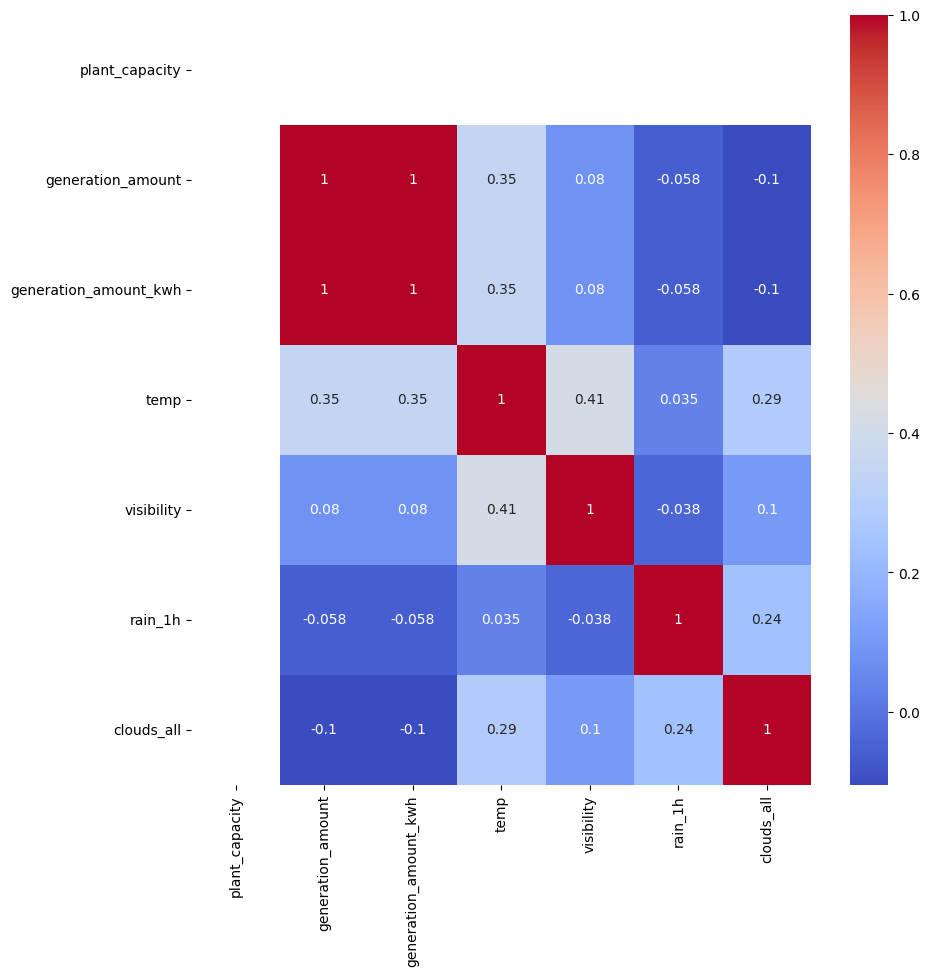

In [23]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    df.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df

,plant_name,plant_capacity,date,generation_date,generation_amount,generation_amount_kwh,temp,visibility,rain_1h,clouds_all
0,HKL (GGI),269.28,2023-12-17,2023-12-17 10:00:00+00:00,3214.144411,3.214144,20.71,0.0,0.0,4
1,HKL (GGI),269.28,2023-12-17,2023-12-17 11:00:00+00:00,143194.428392,143.194428,20.77,0.0,0.0,0
2,HKL (GGI),269.28,2023-12-17,2023-12-17 12:00:00+00:00,172095.884100,172.095884,20.78,3500.0,0.0,0
3,HKL (GGI),269.28,2023-12-17,2023-12-17 13:00:00+00:00,158937.316383,158.937316,20.52,3500.0,0.0,0
4,HKL (GGI),269.28,2023-12-17,2023-12-17 14:00:00+00:00,101981.455094,101.981455,17.81,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
15134,HKL (GGI),269.28,2025-10-22,2025-10-22 11:00:00+00:00,1872.542267,1.872542,28.33,0.0,0.0,0
15135,HKL (GGI),269.28,2025-10-22,2025-10-22 12:00:00+00:00,0.000000,0.000000,28.33,0.0,0.0,0
15136,HKL (GGI),269.28,2025-10-22,2025-10-22 13:00:00+00:00,0.000000,0.000000,28.53,4000.0,0.0,40
15137,HKL (GGI),269.28,2025-10-22,2025-10-22 14:00:00+00:00,0.000000,0.000000,26.62,0.0,0.0,0


In [ ]:
df = df[['generation_amount', 'temp', 'visibility', 'rain_1h', 'clouds_all']]

In [27]:
df

,generation_amount,temp,visibility,rain_1h,clouds_all,plant_capacity
0,3214.144411,20.71,0.0,0.0,4,269.28
1,143194.428392,20.77,0.0,0.0,0,269.28
2,172095.884100,20.78,3500.0,0.0,0,269.28
3,158937.316383,20.52,3500.0,0.0,0,269.28
4,101981.455094,17.81,0.0,0.0,0,269.28
...,...,...,...,...,...,...
15134,1872.542267,28.33,0.0,0.0,0,269.28
15135,0.000000,28.33,0.0,0.0,0,269.28
15136,0.000000,28.53,4000.0,0.0,40,269.28
15137,0.000000,26.62,0.0,0.0,0,269.28


In [28]:
# Prepare X and y
X = df.drop(columns='generation_amount')
y = df['generation_amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate (optional, but useful to see performance)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Predictions:", y_pred)

Mean Squared Error: 2064556901.98886
R² Score: 0.16913684112289695
Predictions: [-12475.1885867   33177.65864096  15896.48888499 ...  28554.07644941
  27381.57452741  36195.05815577]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Pour clipper les prédictions négatives si besoin


# Préparer X et y
X = df.drop(columns='generation_amount')
y = df['generation_amount']

# Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline avec scaler et Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest avec 100 arbres
])

# Entraîner
pipeline.fit(X_train, y_train)

# Prédire
y_pred = pipeline.predict(X_test)

# Clipper les prédictions négatives à 0 (au cas où, bien que RF les évite souvent)
y_pred = np.clip(y_pred, 0, None)

# Évaluer
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Predictions (extrait):", y_pred[:10])  # Affiche les 10 premières prédictions

# Importance des features (pour analyser)
regressor = pipeline.named_steps['regressor']
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des features:")
print(feature_importances)

Mean Squared Error: 2222724858.599906
R² Score: 0.1054835080825759
Predictions (extrait): [1.87576162e+04 4.26623271e+03 2.39710566e+04 5.50835119e+00
 0.00000000e+00 3.57350967e+04 1.39443550e+05 0.00000000e+00
 3.83020724e+04 1.19671663e+05]

Importance des features:
      Feature  Importance
0        temp    0.709554
3  clouds_all    0.154834
1  visibility    0.112314
2     rain_1h    0.023299
